In [8]:
# Importing the libraries
import numpy as np # for array operations
import pandas as pd # for working with DataFrames
import requests, io # for HTTP requests and I/O commands
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
from sklearn.metrics import r2_score
# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error


In [2]:

# Reading the data
dataset = pd.read_csv(r'E:\wenqu\zonal_statistics\combined_update1.csv')
# Remove rows with NaN values
dataset = dataset.dropna(axis=0)

# Now 'dataset_without_nan' contains the dataset with rows containing NaN values removed.

dataset.head()

,la_ymax,la_std_value,sla_ymax_value,sla_std_mean_value,d13c_ymax_value,d13c_std_value,d15n_ymax_value,d15n_std_value,ldmc_ymax_value,ldmc_std_value,...,annual_precp_value,defict_value,isothremality_value,mean_temp_coldest_quarter_value,mean_temp_driest_quarter_value,mean_temp_wettest_quarter_value,PET_value,precp_coldest_value,precp_warmest_value,precp_seasonality_value
0,1.138349,2.851361,4.515089,0.534770,-28.100536,2.812606,0.870116,5.093642,-1.235871,0.756113,...,280.0,0.632308,22.0,-273.0,-205.0,93.0,-0.001099,41.0,139.0,61.0
1,0.855036,2.900618,4.462237,0.539418,-28.148775,2.863813,1.521652,5.082226,-1.314599,0.810716,...,280.0,0.871800,22.0,-268.0,-196.0,101.0,-0.001099,40.0,136.0,59.0
2,1.062939,2.792950,4.468578,0.473788,-29.094899,2.764642,0.063880,4.382208,-0.699813,0.799816,...,280.0,0.946000,22.0,-268.0,-196.0,101.0,-0.001099,40.0,136.0,59.0
3,-0.109422,2.755855,4.463972,0.481723,-29.055893,2.374191,-0.979734,4.523654,-0.948795,0.915393,...,280.0,0.725000,22.0,-271.0,-203.0,93.0,-0.001096,41.0,139.0,61.0
4,3.991212,3.187670,4.778846,0.627437,-28.741293,2.802890,-6.886267,5.133915,0.399368,1.177771,...,280.0,0.616722,22.0,-274.5,-207.5,91.0,-0.001099,41.0,139.5,61.0


In [3]:
features = dataset.drop(['la_ymax','la_std_value', 
                         'sla_ymax_value','sla_std_mean_value',
                         'd13c_ymax_value', 'd13c_std_value', 
                         'd15n_ymax_value', 'd15n_std_value',
                        'ldmc_ymax_value', 'ldmc_std_value',
                        'pc_ymax_value', 'pc_std_value'], axis=1) # Features
labels = dataset['la_ymax']




In [4]:
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [5]:
feature_list

['snow_value',
 'slope_value',
 'RAD_value',
 'SWI_value',
 'TWI_value',
 'AET_value',
 'annual_diurnal_temp_value',
 'annual_mean_temp_value',
 'annual_precp_value',
 'defict_value',
 'isothremality_value',
 'mean_temp_coldest_quarter_value',
 'mean_temp_driest_quarter_value',
 'mean_temp_wettest_quarter_value',
 'PET_value',
 'precp_coldest_value',
 'precp_warmest_value',
 'precp_seasonality_value']

### SLA_ymax

In [6]:
sla_labels = dataset['sla_ymax_value']
sla_features = dataset.drop(['la_ymax','la_std_value', 
                         'sla_ymax_value','sla_std_mean_value',
                         'd13c_ymax_value', 'd13c_std_value', 
                         'd15n_ymax_value', 'd15n_std_value',
                        'ldmc_ymax_value', 'ldmc_std_value',
                        'pc_ymax_value', 'pc_std_value'], axis=1) # Features
sla_train_features, sla_test_features, sla_train_labels, sla_test_labels = train_test_split(sla_features, sla_labels, test_size = 0.25, random_state = 42)

In [7]:
# Initialize Random Forest Regressor
rf = RandomForestRegressor()
# Define parameter grid for RandomizedSearchCV
# increasing the n_estimator can potentially increasing the accuracy
# small max_depth can lead to shallower tree and easier to overfitting
param_grid = {
    'n_estimators': [100,  500,  1000],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 30,50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [8]:
start_time = time.time()
# Number of iterations for RandomizedSearchCV
n_iter_search = 5  # Adjust this according to your requirements
# Create tqdm instance with total number of iterations
pbar = tqdm(total=n_iter_search, desc="Hyperparameter tuning")
# Randomized Search Cross Validation
for i in range(n_iter_search):
    rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=1, cv=10, verbose=0, random_state=None, n_jobs=-1)
    rf_random.fit(sla_train_features, sla_train_labels)
    # Update progress bar
    pbar.update(1)
# Close progress bar
pbar.close()
# Get best parameters combination
best_params = rf_random.best_params_
print("Best parameters combination:", best_params)
# Initialize Random Forest Regressor with best parameters
rf_best = RandomForestRegressor(**best_params)
# Train the model on the training data
rf_best.fit(sla_train_features, sla_train_labels)
# Predictions on test data
predictions = rf_best.predict(sla_test_features)
# Calculate mean squared error
mse = mean_squared_error(sla_test_labels, predictions)
print('Mean Squared Error:', mse)
# Record end time
end_time = time.time()
# Calculate total time taken
total_time = end_time - start_time
print("Total time taken:", total_time, "seconds")

Hyperparameter tuning:   0%|                                                                     | 0/5 [00:00<?, ?it/s]C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
Hyperparameter tuning:  40%|████████████████████████                                    | 2/5 [03:56<05:15, 105.31s/it]C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
Hyperparameter tuning:  60%|████████

Best parameters combination: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}
Mean Squared Error: 0.0033371217593414233
Total time taken: 418.06158447265625 seconds


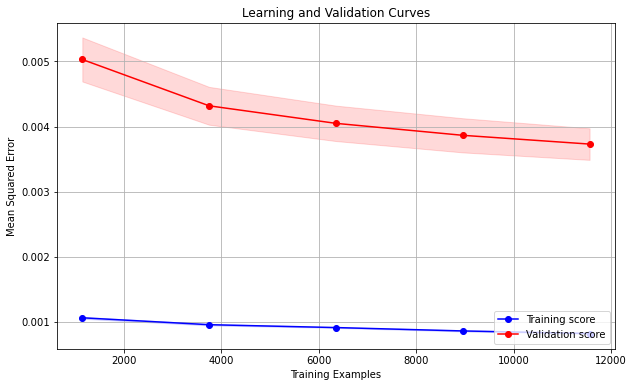

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.ensemble import RandomForestRegressor
# Assuming sla_train_features, sla_train_labels are your training data
# Define Random Forest Regressor with best parameters

# Function to plot both learning and validation curves
def plot_curves(estimator, X, y, param_name, param_range, cv):
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=np.linspace(.1, 1.0, 5),
        scoring='neg_mean_squared_error', n_jobs=-1)
    # Convert negative mean squared error to positive for clarity
    train_scores = -train_scores
    validation_scores = -validation_scores
    # Calculate mean and standard deviation of training and validation scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    validation_mean = np.mean(validation_scores, axis=1)
    validation_std = np.std(validation_scores, axis=1)
    # Plot both curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training score', color='blue', marker='o')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, validation_mean, label='Validation score', color='red', marker='o')
    plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='red')
    # Add labels, title, and legend
    plt.title('Learning and Validation Curves')
    plt.xlabel('Training Examples')
    plt.ylabel('Mean Squared Error')
    plt.legend(loc='lower right')
    # Show plot
    plt.grid()
    plt.show()
# Plot curves
plot_curves(rf_best, sla_train_features, sla_train_labels, param_name=None, param_range=None, cv=10)

Mean Squared Error: 0.0033394835065331694
R-squared: 0.5581507037108154


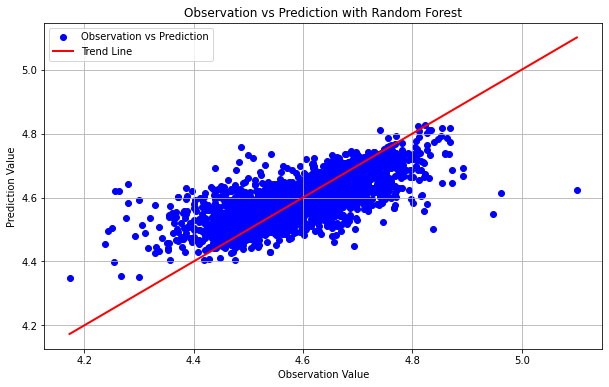

In [9]:

best_params = {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}
rf_best = RandomForestRegressor(**best_params)
# Train the Random Forest model with the best parameters
rf_best.fit(sla_train_features, sla_train_labels)
# Make predictions on the test set
predictions = rf_best.predict(sla_test_features)
# Calculate mean squared error and R-squared
mse = mean_squared_error(sla_test_labels, predictions)
r2 = r2_score(sla_test_labels, predictions)
print('Mean Squared Error:', mse)
print('R-squared:', r2)
# Plot the observation values against the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(sla_test_labels, predictions, color='blue', label='Observation vs Prediction')
# Plot the trend line (perfect predictions)
max_val = max(sla_test_labels.max(), predictions.max())
min_val = min(sla_test_labels.min(), predictions.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=2, label='Trend Line')
# Add labels, title, and legend
plt.title('Observation vs Prediction with Random Forest')
plt.xlabel('Observation Value')
plt.ylabel('Prediction Value')
plt.legend()
# Show plot
plt.grid()
plt.show()

In [10]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(sla_test_labels, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(sla_test_labels, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(sla_test_labels, predictions)))

Mean Absolute Error: 0.03872902562583893
Mean Squared Error: 0.0033394835065331694
Root Mean Squared Error: 0.057788264436070144


In [11]:
import numpy as np

def calculate_rmse(actual_values, predicted_values):
    """
    Calculate the Root Mean Square Error (RMSE) between actual and predicted values.

    Parameters:
        actual_values (array-like): Array-like object containing the actual values.
        predicted_values (array-like): Array-like object containing the predicted values.

    Returns:
        float: The RMSE value.
    """
    # Convert inputs to numpy arrays
    actual_values = np.array(actual_values)
    predicted_values = np.array(predicted_values)
    
    # Calculate squared differences
    squared_diff = (predicted_values - actual_values) ** 2
    
    # Calculate mean squared difference
    mean_squared_diff = squared_diff.mean()
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_diff)
    
    return rmse


print("RMSE:", calculate_rmse(sla_test_labels, predictions))


RMSE: 0.057788264436070144


In [12]:
import numpy as np

def calculate_residuals(actual_values, predicted_values):
    """
    Calculate residuals (the differences between observed and predicted values).

    Parameters:
        actual_values (array-like): Array-like object containing the actual values.
        predicted_values (array-like): Array-like object containing the predicted values.

    Returns:
        numpy.ndarray: Array of residuals.
    """
    # Convert inputs to numpy arrays
    actual_values = np.array(actual_values)
    predicted_values = np.array(predicted_values)
    
    # Calculate residuals
    residuals = actual_values - predicted_values
    
    return residuals


residuals = calculate_residuals(sla_test_labels, predictions)
print("Residuals:", residuals)


Residuals: [-0.06174788  0.01652777 -0.00486316 ...  0.02104487  0.04498669
 -0.01476429]


In [8]:
# Instantiate model with 1000 decision trees
sla_rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
sla_rf.fit(sla_train_features, sla_train_labels);

In [9]:
# Use the forest's predict method on the test data
predictions = sla_rf.predict(sla_test_features)
# Calculate the absolute errors
errors = abs(predictions - sla_test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.04


In [10]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / sla_test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.14 %.


In [11]:
# Get numerical feature importances
importances = list(sla_rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: slope_value          Importance: 0.13
Variable: TWI_value            Importance: 0.11
Variable: PET_value            Importance: 0.11
Variable: RAD_value            Importance: 0.09
Variable: AET_value            Importance: 0.09
Variable: precp_warmest_value  Importance: 0.08
Variable: snow_value           Importance: 0.07
Variable: SWI_value            Importance: 0.07
Variable: defict_value         Importance: 0.07
Variable: mean_temp_driest_quarter_value Importance: 0.04
Variable: annual_precp_value   Importance: 0.03
Variable: mean_temp_coldest_quarter_value Importance: 0.03
Variable: annual_mean_temp_value Importance: 0.02
Variable: mean_temp_wettest_quarter_value Importance: 0.02
Variable: annual_diurnal_temp_value Importance: 0.01
Variable: precp_coldest_value  Importance: 0.01
Variable: precp_seasonality_value Importance: 0.01
Variable: isothremality_value  Importance: 0.0


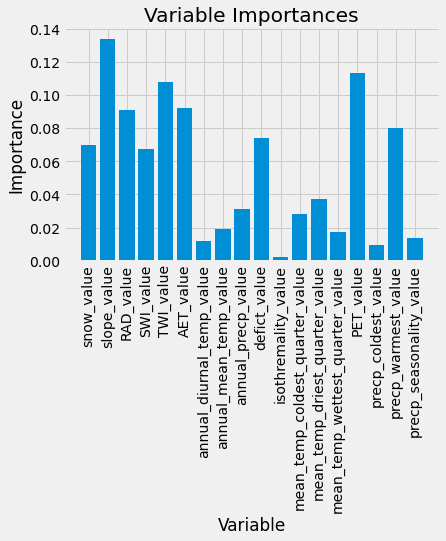

In [12]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### sla_std

In [13]:
sla_std_labels = dataset['sla_std_mean_value']
sla_std_features = dataset.drop(['la_ymax','la_std_value', 
                         'sla_ymax_value','sla_std_mean_value',
                         'd13c_ymax_value', 'd13c_std_value', 
                         'd15n_ymax_value', 'd15n_std_value',
                        'ldmc_ymax_value', 'ldmc_std_value',
                        'pc_ymax_value', 'pc_std_value'], axis=1) # Features
sla_std_train_features, sla_std_test_features, sla_std_train_labels, sla_std_test_labels = train_test_split(sla_std_features, sla_std_labels, test_size = 0.25, random_state = 42)

In [14]:
# Instantiate model with 1000 decision trees
sla_std_rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
sla_std_rf.fit(sla_std_train_features, sla_std_train_labels);

In [15]:
# Use the forest's predict method on the test data
predictions = sla_std_rf.predict(sla_std_test_features)
# Calculate the absolute errors
errors = abs(predictions - sla_std_test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.03


In [16]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / sla_std_test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 92.65 %.


In [17]:
# Get numerical feature importances
importances = list(sla_std_rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: RAD_value            Importance: 0.12
Variable: PET_value            Importance: 0.12
Variable: slope_value          Importance: 0.11
Variable: snow_value           Importance: 0.1
Variable: TWI_value            Importance: 0.09
Variable: SWI_value            Importance: 0.08
Variable: AET_value            Importance: 0.08
Variable: defict_value         Importance: 0.07
Variable: annual_precp_value   Importance: 0.05
Variable: annual_diurnal_temp_value Importance: 0.03
Variable: mean_temp_wettest_quarter_value Importance: 0.03
Variable: annual_mean_temp_value Importance: 0.02
Variable: mean_temp_coldest_quarter_value Importance: 0.02
Variable: mean_temp_driest_quarter_value Importance: 0.02
Variable: precp_warmest_value  Importance: 0.02
Variable: precp_coldest_value  Importance: 0.01
Variable: precp_seasonality_value Importance: 0.01
Variable: isothremality_value  Importance: 0.0


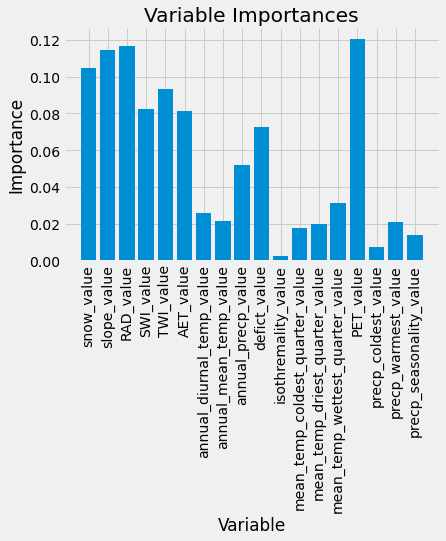

In [18]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### LA Ymax

In [19]:
la_labels = dataset['la_ymax']
la_features = dataset.drop(['la_ymax','la_std_value', 
                         'sla_ymax_value','sla_std_mean_value',
                         'd13c_ymax_value', 'd13c_std_value', 
                         'd15n_ymax_value', 'd15n_std_value',
                        'ldmc_ymax_value', 'ldmc_std_value',
                        'pc_ymax_value', 'pc_std_value'], axis=1) # Features
la_train_features, la_test_features, la_train_labels, la_test_labels = train_test_split(la_features, la_labels, test_size = 0.25, random_state = 42)

In [20]:
# Instantiate model with 1000 decision trees
la_rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
la_rf.fit(la_train_features, la_train_labels);

In [21]:
# Use the forest's predict method on the test data
predictions = la_rf.predict(la_test_features)
# Calculate the absolute errors
errors = abs(predictions - la_test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.44


In [22]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / la_test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 74.83 %.


In [24]:
# Get numerical feature importances
importances = list(la_rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: slope_value          Importance: 0.12
Variable: TWI_value            Importance: 0.12
Variable: RAD_value            Importance: 0.11
Variable: annual_precp_value   Importance: 0.1
Variable: snow_value           Importance: 0.09
Variable: SWI_value            Importance: 0.08
Variable: AET_value            Importance: 0.08
Variable: defict_value         Importance: 0.08
Variable: PET_value            Importance: 0.05
Variable: precp_warmest_value  Importance: 0.04
Variable: mean_temp_driest_quarter_value Importance: 0.03
Variable: annual_mean_temp_value Importance: 0.02
Variable: mean_temp_coldest_quarter_value Importance: 0.02
Variable: mean_temp_wettest_quarter_value Importance: 0.02
Variable: precp_seasonality_value Importance: 0.02
Variable: annual_diurnal_temp_value Importance: 0.01
Variable: precp_coldest_value  Importance: 0.01
Variable: isothremality_value  Importance: 0.0


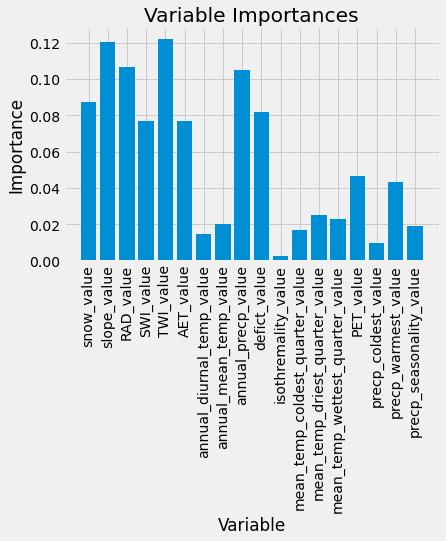

In [25]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### LA STD

In [26]:
la_std_labels = dataset['la_std_value']
la_std_features = dataset.drop(['la_ymax','la_std_value', 
                         'sla_ymax_value','sla_std_mean_value',
                         'd13c_ymax_value', 'd13c_std_value', 
                         'd15n_ymax_value', 'd15n_std_value',
                        'ldmc_ymax_value', 'ldmc_std_value',
                        'pc_ymax_value', 'pc_std_value'], axis=1) # Features
la_std_train_features, la_std_test_features, la_std_train_labels, la_std_test_labels = train_test_split(la_std_features, la_std_labels, test_size = 0.25, random_state = 42)

In [27]:
# Instantiate model with 1000 decision trees
la_std_rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
la_std_rf.fit(la_std_train_features, la_std_train_labels);

In [28]:
# Use the forest's predict method on the test data
predictions = la_std_rf.predict(la_std_test_features)
# Calculate the absolute errors
errors = abs(predictions - la_std_test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.18


In [29]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / la_std_test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 90.8 %.


In [30]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / la_std_test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 90.8 %.


In [31]:
# Get numerical feature importances
importances = list(la_std_rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: slope_value          Importance: 0.13
Variable: TWI_value            Importance: 0.12
Variable: snow_value           Importance: 0.1
Variable: RAD_value            Importance: 0.1
Variable: annual_precp_value   Importance: 0.09
Variable: defict_value         Importance: 0.08
Variable: AET_value            Importance: 0.07
Variable: SWI_value            Importance: 0.06
Variable: annual_diurnal_temp_value Importance: 0.05
Variable: precp_warmest_value  Importance: 0.05
Variable: PET_value            Importance: 0.03
Variable: isothremality_value  Importance: 0.02
Variable: mean_temp_coldest_quarter_value Importance: 0.02
Variable: mean_temp_driest_quarter_value Importance: 0.02
Variable: mean_temp_wettest_quarter_value Importance: 0.02
Variable: precp_seasonality_value Importance: 0.02
Variable: annual_mean_temp_value Importance: 0.01
Variable: precp_coldest_value  Importance: 0.01


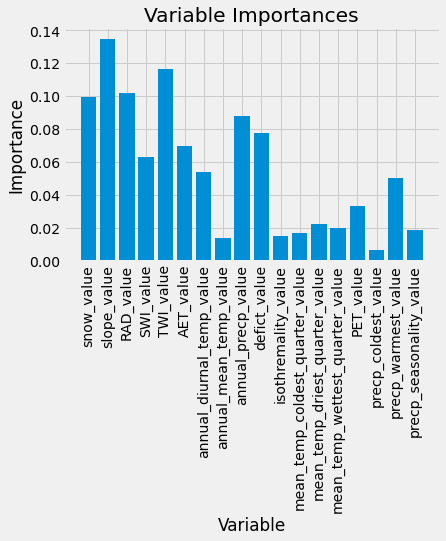

In [32]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### D13C YMAX

In [34]:
d13c_labels = dataset['d13c_ymax_value']
d13c_features = dataset.drop(['la_ymax','la_std_value', 
                         'sla_ymax_value','sla_std_mean_value',
                         'd13c_ymax_value', 'd13c_std_value', 
                         'd15n_ymax_value', 'd15n_std_value',
                        'ldmc_ymax_value', 'ldmc_std_value',
                        'pc_ymax_value', 'pc_std_value'], axis=1) # Features
d13c_train_features, d13c_test_features, d13c_train_labels, d13c_test_labels = train_test_split(d13c_features, d13c_labels, test_size = 0.25, random_state = 42)

In [35]:
# Instantiate model with 1000 decision trees
d13c_rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
d13c_rf.fit(d13c_train_features, d13c_train_labels);

In [ ]:
# Use the forest's predict method on the test data
predictions = d13c_rf.predict(d13c_test_features)
# Calculate the absolute errors
errors = abs(predictions - d13c_test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

In [6]:
# Using Skicit-learn to split data into training and testing sets

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [7]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (12840, 18)
Training Labels Shape: (12840,)
Testing Features Shape: (4280, 18)
Testing Labels Shape: (4280,)


In [8]:
# Import the model we are using

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [9]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.44


In [10]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 74.83 %.


In [11]:
from sklearn.metrics import r2_score

# Assuming train_features and train_labels are your training data
# rf is your trained RandomForestRegressor model
# Make sure you have already trained your model before using it for prediction

# Predicting on training set
train_predictions = rf.predict(train_features)

# Calculate R^2 score
r2 = r2_score(train_labels, train_predictions)

print("R^2 Score on training set:", r2)


R^2 Score on training set: 0.9214759356479756


In [13]:
import time

import numpy as np

start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.211 seconds


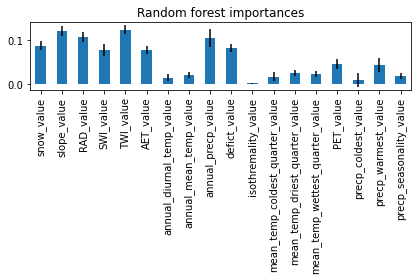

In [17]:
import pandas as pd

rf_importances = pd.Series(importances, index=feature_list)

fig, ax = plt.subplots()
rf_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Random forest importances")

fig.tight_layout()

In [19]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: slope_value          Importance: 0.12
Variable: TWI_value            Importance: 0.12
Variable: RAD_value            Importance: 0.11
Variable: annual_precp_value   Importance: 0.1
Variable: snow_value           Importance: 0.09
Variable: SWI_value            Importance: 0.08
Variable: AET_value            Importance: 0.08
Variable: defict_value         Importance: 0.08
Variable: PET_value            Importance: 0.05
Variable: precp_warmest_value  Importance: 0.04
Variable: mean_temp_driest_quarter_value Importance: 0.03
Variable: annual_mean_temp_value Importance: 0.02
Variable: mean_temp_coldest_quarter_value Importance: 0.02
Variable: mean_temp_wettest_quarter_value Importance: 0.02
Variable: precp_seasonality_value Importance: 0.02
Variable: annual_diurnal_temp_value Importance: 0.01
Variable: precp_coldest_value  Importance: 0.01
Variable: isothremality_value  Importance: 0.0
